In [51]:
import numpy as np 
import pandas as pd 
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline

import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # forces tf to run on cpu 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow_addons as tfa

#removing cuda warnings for gpu
import warnings
warnings.filterwarnings('ignore')

In [32]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

train_df = train_df.drop('Segmentation' , axis=1)
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [33]:
train_df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [34]:
# replaces NaN values in numerical columns with the mode of each respective column.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
col_num = train_df.select_dtypes(include=numerics)

for col in col_num:
    train_df[col].replace([np.nan], train_df[col].mode()[0], inplace=True)

In [35]:
#replaces NaN values in categorical columns with the string 'None'.
categorical = ['object']
cat_columns = train_df.select_dtypes(include=categorical)

for col in cat_columns:
    train_df[col].replace([np.nan], 'None', inplace=True)


In [65]:
# replaces NaN values in numerical columns with the mode of each respective column.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
col_num = test_df.select_dtypes(include=numerics)

for col in col_num:
    test_df[col].replace([np.nan], test_df[col].mode()[0], inplace=True)

In [66]:
#replaces NaN values in categorical columns with the string 'None'.
categorical = ['object']
cat_columns = test_df.select_dtypes(include=categorical)

for col in cat_columns:
    test_df[col].replace([np.nan], 'None', inplace=True)


In [36]:
train_df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [67]:
test_df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [37]:
label_list = set(train_df['Var_1'])
label_list

{'Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7', 'None'}

In [38]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


In [39]:
def replacing_classes(row: 'object'):
    if row != 'Cat_4' and row != 'Cat_6':
        return 'Other'
    else:
        return row

train=True, 
only_label=False

try:
    # Dropping specified columns
    if train:
        print('dropping columns...')
        train_df.drop(columns=['ID', 'Age'], inplace=True)
    if not train:
        print('dropping ID column')
        train_df.drop(columns=['ID', 'Var_1', 'Age'], inplace=True)

    # Replacing numerical NaNs with mode
    print('replacing numerical NaNs with mode...')
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_num = train_df.select_dtypes(include=numerics)
    for col in col_num:
        train_df[col].replace([np.nan], train_df[col].mode()[0], inplace=True)

    # Replacing categorical NaNs with 'None' string
    print('replacing categorical NaNs with None string...')
    categorical = ['object']
    cat_columns = train_df.select_dtypes(include=categorical)
    for col in cat_columns:
        train_df[col].replace([np.nan], 'None', inplace=True)

    # Changing anything other than 'Cat_6' and 'Cat_4' to 'Other'
    if train:
        print('changing anything other than Cat_6 and Cat_4 to Other...')
        # train_df['Var_1'] = train_df['Var_1'].apply(replacing_classes)
        train_df['Var_1'].replace(['Cat_3', 'Cat_2', 'Cat_7', 'Cat_1', 'Cat_5'], ["Other","Other","Other","Other","Other"], inplace=True)
        print(train_df['Var_1'].value_counts())

    # Label encoding categorical data
    print('label encoding categorical data...')
    label_encoder = preprocessing.LabelEncoder()
    columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
    for column in columns_to_encode:
        train_df[column] = label_encoder.fit_transform(train_df[column])

    print('\033[1m' + 'SUCCESSFULLY PERFORMED PREPROCESSING' + '\033[0m')
except Exception as e:
    print('error occurred in pre-processing')
    print(e)
    # Return False or handle the error as needed


dropping columns...
replacing numerical NaNs with mode...
replacing categorical NaNs with None string...
changing anything other than Cat_6 and Cat_4 to Other...
Var_1
Cat_6    5238
Other    1665
Cat_4    1089
None       76
Name: count, dtype: int64
label encoding categorical data...
SUCCESSFULLY PERFORMED PREPROCESSING


In [68]:
try:
    # Dropping specified columns
    if train:
        print('dropping columns...')
        test_df.drop(columns=['ID', 'Age'], inplace=True)
    if not train:
        print('dropping ID column')
        test_df.drop(columns=['ID', 'Var_1', 'Age'], inplace=True)

    # Replacing numerical NaNs with mode
    print('replacing numerical NaNs with mode...')
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_num = test_df.select_dtypes(include=numerics)
    for col in col_num:
        test_df[col].replace([np.nan], test_df[col].mode()[0], inplace=True)

    # Replacing categorical NaNs with 'None' string
    print('replacing categorical NaNs with None string...')
    categorical = ['object']
    cat_columns = test_df.select_dtypes(include=categorical)
    for col in cat_columns:
        test_df[col].replace([np.nan], 'None', inplace=True)

    # Changing anything other than 'Cat_6' and 'Cat_4' to 'Other'
    if train:
        print('changing anything other than Cat_6 and Cat_4 to Other...')
        # train_df['Var_1'] = train_df['Var_1'].apply(replacing_classes)
        test_df['Var_1'].replace(['Cat_3', 'Cat_2', 'Cat_7', 'Cat_1', 'Cat_5'], ["Other","Other","Other","Other","Other"], inplace=True)
        print(test_df['Var_1'].value_counts())

    # Label encoding categorical data
    print('label encoding categorical data...')
    label_encoder = preprocessing.LabelEncoder()
    columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
    for column in columns_to_encode:
        test_df[column] = label_encoder.fit_transform(test_df[column])

    print('\033[1m' + 'SUCCESSFULLY PERFORMED PREPROCESSING' + '\033[0m')
except Exception as e:
    print('error occurred in pre-processing')
    print(e)
    # Return False or handle the error as needed

dropping columns...
replacing numerical NaNs with mode...
replacing categorical NaNs with None string...
changing anything other than Cat_6 and Cat_4 to Other...
Var_1
Cat_6    1672
Other     537
Cat_4     386
None       32
Name: count, dtype: int64
label encoding categorical data...
SUCCESSFULLY PERFORMED PREPROCESSING


In [40]:
train_df.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,0,5,1.0,2,4.0,0
1,0,2,2,2,1.0,0,3.0,0
2,0,2,2,2,1.0,2,1.0,1
3,1,2,2,7,0.0,1,2.0,1
4,0,2,2,3,1.0,1,6.0,1


In [69]:
test_df.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,2,2,2,0.0,2,1.0,1
1,1,2,2,5,8.0,0,4.0,1
2,0,2,0,9,0.0,2,1.0,1
3,1,2,0,4,11.0,1,2.0,1
4,0,0,0,8,1.0,2,4.0,1


In [41]:
# Define your features (X) and target (y)
X = train_df.drop(columns=['Var_1'])
y = train_df['Var_1']

In [42]:
X.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,0,5,1.0,2,4.0
1,0,2,2,2,1.0,0,3.0
2,0,2,2,2,1.0,2,1.0
3,1,2,2,7,0.0,1,2.0
4,0,2,2,3,1.0,1,6.0


In [43]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Var_1, dtype: int32

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, stratify=y , shuffle=True)

In [57]:
y_train.nunique()

4

In [58]:
y_train.value_counts()

Var_1
1    3928
3    1249
0     817
2      57
Name: count, dtype: int64

In [70]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128))
# Dropout for regularization
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(len(y_train.unique()), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[tfa.metrics.F1Score(average='micro', num_classes=len(y_train.unique())), 'accuracy'])
print(model.summary())

# Convert data to numpy arrays
X_train_array = X_train.values
y_train_array = y_train.values
X_val_array = X_val.values
y_val_array = y_val.values

# Callback to stop training if reverse learning happens
# Patience is set to 200, stop won't happen before 200 epochs
callbacks = EarlyStopping(monitor='val_loss', mode='min', patience=75)

# Train the model
history = model.fit(X_train_array, y_train_array, epochs=50, verbose=1, validation_data=(X_train_array, y_train_array))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 512)               4096      
                                                                 
 dense_63 (Dense)            (None, 256)               131328    
                                                                 
 dense_64 (Dense)            (None, 128)               32896     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_65 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_66 (Dense)            (None, 16)              

In [71]:
# # Evaluate the model on the test set
# test_loss, test_f1, test_acc = model.evaluate(X_val_array, y_val_array)
# print(f'Test loss: {test_loss}, Test F1 Score: {test_f1}, Test accuracy: {test_acc}')

# Callback to stop training if reverse learning happens and monitor F1-score on validation data
callbacks = [EarlyStopping(monitor='val_f1_score', mode='max', patience=25, restore_best_weights=True)]

# Train the model
history = model.fit(X_train_array, y_train_array, epochs=100, verbose=1, 
                    validation_data=(X_val_array, y_val_array), callbacks=callbacks)

print(f'Test loss: {test_loss}, Test F1 Score: {test_f1}, Test accuracy: {test_acc}')

Epoch 1/100
190/190 [==============================] - 1s 5ms/step - loss: 0.8810 - f1_score: 0.4187 - accuracy: 0.6551 - val_loss: 0.8806 - val_f1_score: 0.4187 - val_accuracy: 0.6539
Epoch 2/100
190/190 [==============================] - 1s 5ms/step - loss: 0.8801 - f1_score: 0.4187 - accuracy: 0.6523 - val_loss: 0.8789 - val_f1_score: 0.4187 - val_accuracy: 0.6544
Epoch 3/100
190/190 [==============================] - 1s 5ms/step - loss: 0.8824 - f1_score: 0.4187 - accuracy: 0.6521 - val_loss: 0.8816 - val_f1_score: 0.4187 - val_accuracy: 0.6525
Epoch 4/100
190/190 [==============================] - 1s 5ms/step - loss: 0.8766 - f1_score: 0.4187 - accuracy: 0.6554 - val_loss: 0.8823 - val_f1_score: 0.4187 - val_accuracy: 0.6520
Epoch 5/100
190/190 [==============================] - 1s 5ms/step - loss: 0.8779 - f1_score: 0.4187 - accuracy: 0.6546 - val_loss: 0.8811 - val_f1_score: 0.4187 - val_accuracy: 0.6520
Epoch 6/100
190/190 [==============================] - 1s 5ms/step - loss: 

In [72]:
# create X_test and y_test
X_test = test_df.drop('Var_1', axis=1)
y_test = test_df['Var_1']

In [73]:
# make prediction on test data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred

83/83 [==============================] - 0s 2ms/step


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

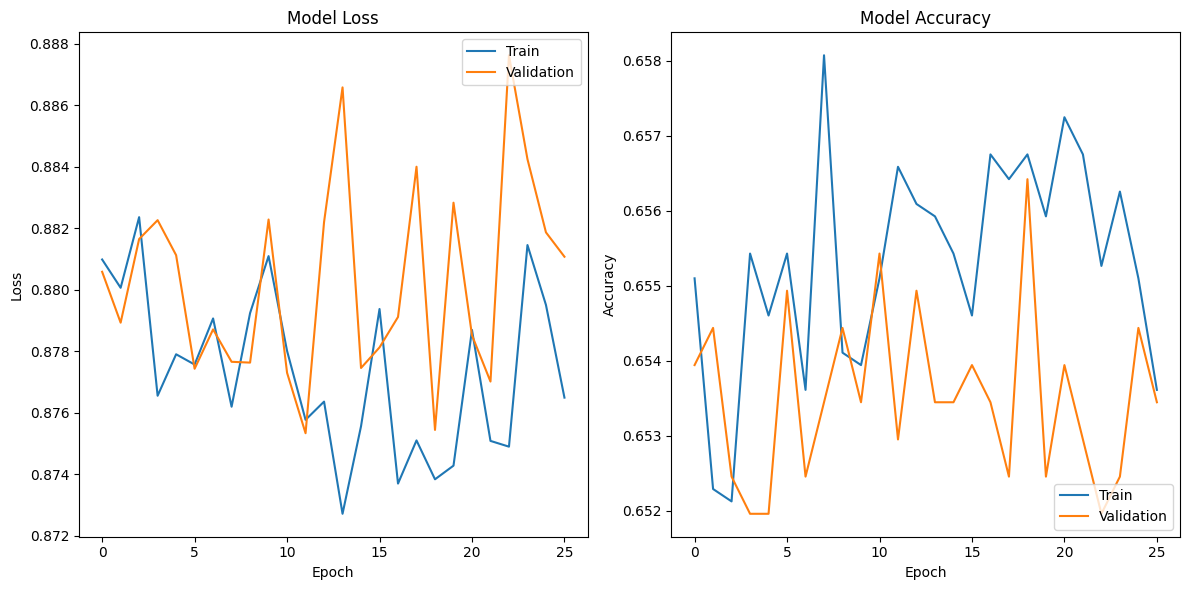

In [74]:
# Plotting the Loss curves
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plotting the F1-Score curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.05      0.09       386
           1       0.64      1.00      0.78      1672
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00       537

    accuracy                           0.64      2627
   macro avg       0.36      0.26      0.22      2627
weighted avg       0.53      0.64      0.51      2627



In [96]:
def calculate_tpr_fpr(y_real, y_pred):

# Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    tpr =  TP/(TP + FN)
    fpr = 1 - TN/(TN+FP)

    return tpr, fpr

In [97]:
X_test = pd.DataFrame(X_test)
#y_test = pd.DataFrame(y_test)
X_test.shape, y_test.shape

((2627, 7), (2627,))

In [98]:
# Link: https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

# Link: https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        snb.scatterplot(x = fpr, y = tpr, ax = ax)
    snb.lineplot(x = fpr, y = tpr, ax = ax)
    snb.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [99]:
# Reference: https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a
def plot_roc_auc(test, y_pred):
    '''This plots the roc auc'''
    classes_combinations = []
    class_list = list(set(test))
    for i in range(len(class_list)):
        for j in range(i+1, len(class_list)):
            classes_combinations.append([class_list[i], class_list[j]])
            classes_combinations.append([class_list[j], class_list[i]])
    print(classes_combinations)
    plt.figure(figsize = (20, 7))
    bins = [i/20 for i in range(20)] + [1]
    roc_auc_ovo = {}
    for i in range(len(classes_combinations)):
        # Gets the class
        comb = classes_combinations[i]
        c1 = comb[0]
        c2 = comb[1]
        c1_index = class_list.index(c1)
        title = c1 + " vs " +c2

        # Prepares an auxiliar dataframe to help with the plots
        df_aux = test_df.copy()
        df_aux['class'] = test
        df_aux['prob'] = y_pred[:, c1_index]

        # Slices only the subset with both classes
        df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
        df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
        df_aux = df_aux.reset_index(drop = True)

        # Plots the probability distribution for the class and the rest
        ax = plt.subplot(2, 6, i+1)
        snb.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
        ax.set_title(title)
        ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
        ax.set_xlabel(f"P(x = {c1})")

        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 6, i+7)
        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
        plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
        ax_bottom.set_title("ROC Curve OvO")

        # Calculates the ROC AUC OvO
        roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
    plt.tight_layout()

In [100]:
test = list()
y_test_arr = y_test.values
for i in range(len(y_test_arr)):
    test.append(np.argmax(y_test_arr[i]))

In [101]:
plot_roc_auc(test, y_pred)

[]


<Figure size 2000x700 with 0 Axes>